### (a) Data Processing


#### 1. Download and read the data. For Python, you may use pandas library and use read csv function.

In [ ]:
import pandas as pd

train_df = pd.read_csv('data_train.csv')

#### 2. Print the first 5 rows of the data using the command. (You may use head() function in pandas library). Print the shape of the training dataframe. Write a short description of the data.

In [ ]:
print(train_df.head(n=5))
print(train_df.shape)

   Unnamed: 0  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0           0        797.0    -200.0       2.1          593.0    146.0   
1           1       1282.0    -200.0      11.0         1013.0    354.0   
2           2        891.0    -200.0       7.6          882.0    342.0   
3           3       1285.0    -200.0      18.1         1243.0    481.0   
4           4        892.0    -200.0       7.3          869.0     71.0   

   PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  
0        1212.0     72.0         984.0        494.0  10.8  49.7  0.6429  
1         545.0    141.0        1384.0       1287.0  17.4  50.6  0.9989  
2         885.0    149.0         950.0        894.0   7.8  33.9  0.3594  
3         599.0    173.0        1815.0       1582.0  26.4  41.9  1.4237  
4         953.0     77.0        1363.0        632.0  37.4  14.7  0.9295  
(6250, 13)


So we can see from the shape that we have 6250 rows of data for the 12 provided air quality features:

1. NMHC(GT): hourly averaged overall Non Metanic HydroCarbons concentration in mi-
crog/ m3
2. C6H6(GT): hourly averaged Benzene concentration in microg/m3
3. PT08.S2(NMHC): hourly averaged sensor response to NMHC
4. NOx(GT): hourly averaged NOx concentration in ppb
5. PT08.S3(NOx): hourly averaged sensor response for NOx
6. NO2(GT): hourly averaged NO2 concentration in microg/m3
7. PT08.S4(NO2): hourly averaged sensor response for NO2
8. PT08.S5(O3): hourly averaged sensor response for O3
9. T: Temperature in C
10. RH: Relative Humidity
11. AH: Absolute Humidity
12. PT08.S1(CO): TARGET VARIABLE - hourly averaged sensor response for CO

#### 3. Does the data have any missing values? How many are missing? Return the number of
missing values. (In pandas, check out isnul() and isnul().sum()

In [ ]:
print(train_df[train_df.isnull()])

print(train_df.isnull().sum())
print(train_df.isnull().sum().sum())

      Unnamed: 0  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0            NaN          NaN       NaN       NaN            NaN      NaN   
1            NaN          NaN       NaN       NaN            NaN      NaN   
2            NaN          NaN       NaN       NaN            NaN      NaN   
3            NaN          NaN       NaN       NaN            NaN      NaN   
4            NaN          NaN       NaN       NaN            NaN      NaN   
...          ...          ...       ...       ...            ...      ...   
6245         NaN          NaN       NaN       NaN            NaN      NaN   
6246         NaN          NaN       NaN       NaN            NaN      NaN   
6247         NaN          NaN       NaN       NaN            NaN      NaN   
6248         NaN          NaN       NaN       NaN            NaN      NaN   
6249         NaN          NaN       NaN       NaN            NaN      NaN   

      PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)   T  RH  AH  
0     

We use DataFrame.isnull() to get a new dataframe with the values as False if there is data and True if the data is mising in that cell. Then we can index into the original dataframe using this mask and see the rows with missing values. Then we can call DataFrame.isnull().sum() to get the number of rows with missing values, which in this case is 77. Or if you want the total number of cells with missing values we can do another .sum() which is 924 in this case.

#### 4. Drop all the rows with any missing data. (In pandas, check out dropna(). dropna() accepts an argument inplace, check out what it does and when it comes in handy.)

In [ ]:
train_df.dropna(inplace=True)

print(train_df.shape)

(6173, 13)


We use inplace=True to modify the existing DataFrame instead of creating a new one. After removing duplicate rows we see the shape has changed and the number of rows is decreased from 6250 to 6173 from deleting the 77 rows with missing data.

#### 5. Extract the features and the label. The label is PT08.S1(CO).

In [ ]:
train_features_df = train_df.drop("PT08.S1(CO)", axis=1)
train_labels_df = train_df["PT08.S1(CO)"]

print(train_features_df.shape)
print(train_labels_df.shape)

(6173, 12)
(6173,)


We use DataFrame.drop() to get a new DataFrame with all the columns except PT08.S1(CO) for the features, and we can use [] to get just the column PT08.S1(CO) for the labels

### (b) Exploratory Data Analysis (10 points)

#### 1. Plot the histograms of all the features in the data. Do all the features have a normal distribution? Do you see any outlier values? Do you need to apply any normalization technique to these values? If so, you can transform your data in this step and explain your thought process in the corresponding markdown cell.

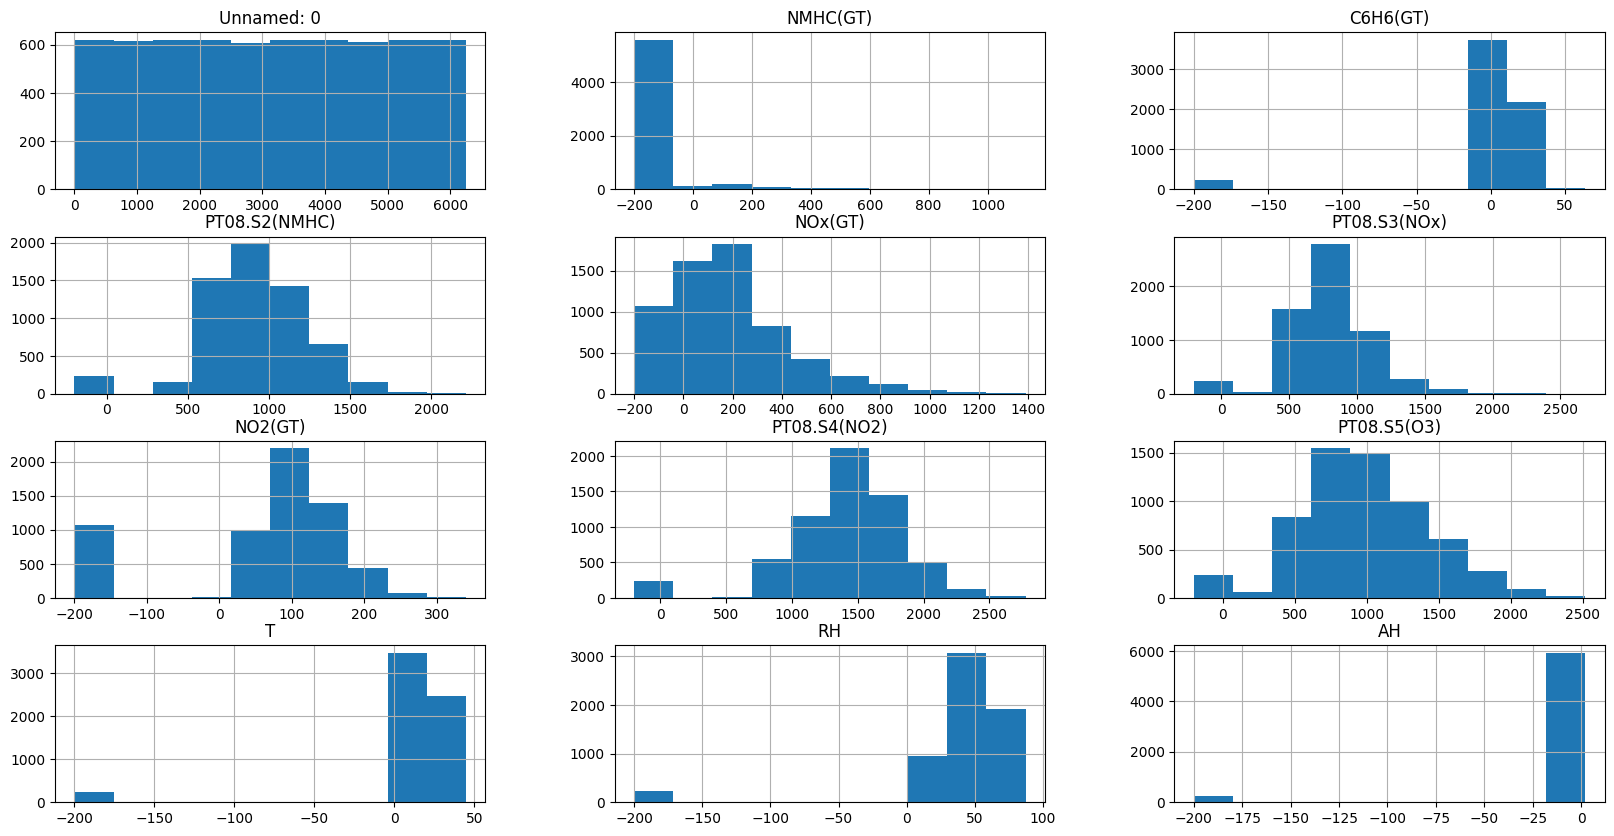

In [ ]:
import matplotlib.pyplot as plt

train_features_df.hist(figsize=(20, 10))
plt.show()